In [40]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 

In [41]:
# Load the stored data object
save_file = './write/1121_umap_annotation.h5ad'
adata = sc.read_h5ad(save_file)

In [42]:
sc.tl.leiden(adata, key_added = "leiden")


running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


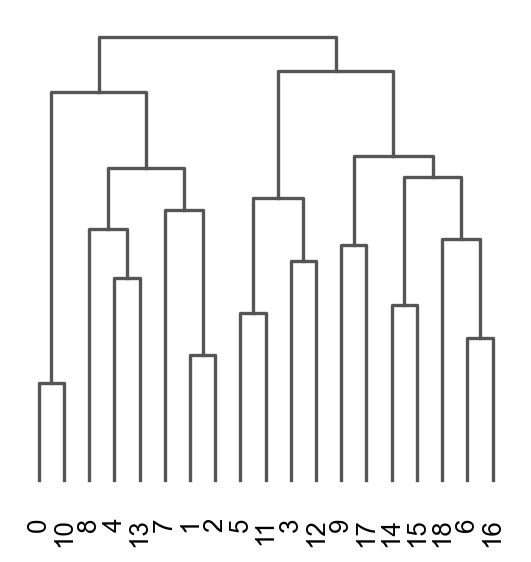

<AxesSubplot:>

In [43]:
sc.pl.dendrogram(adata, groupby = "leiden")


In [ ]:
sc.pl.umap(adata, color=['EpCAM'])


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')


In [ ]:
top_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)


In [ ]:
top_genes

In [44]:
adata

AnnData object with n_obs × n_vars = 1983 × 4892
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [50]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 19 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


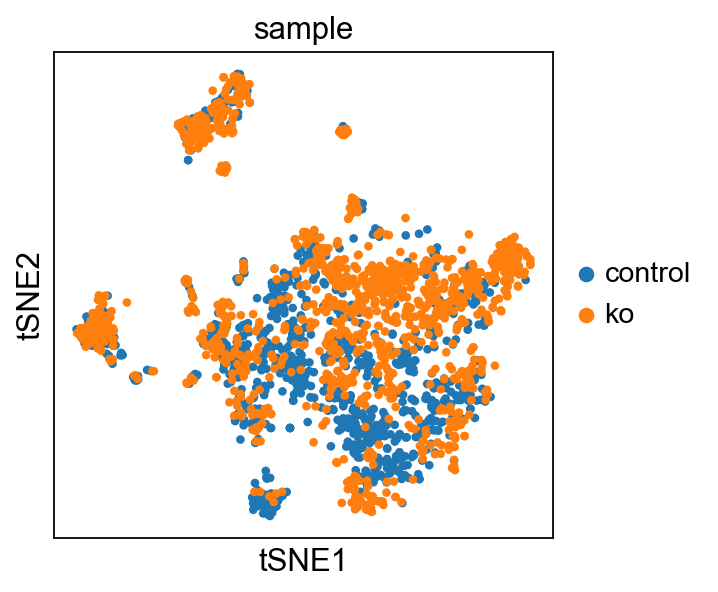

In [45]:
sc.pl.tsne(adata, color="sample")

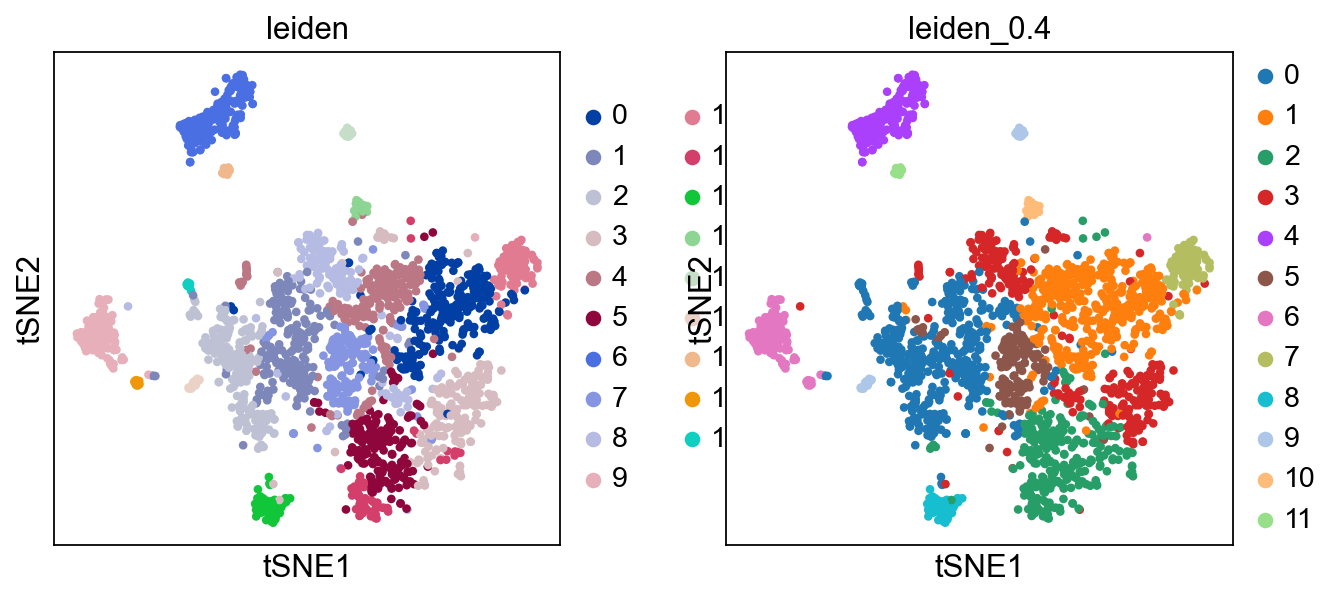

In [51]:
sc.pl.tsne(adata, color=['leiden', 'leiden_0.4'])


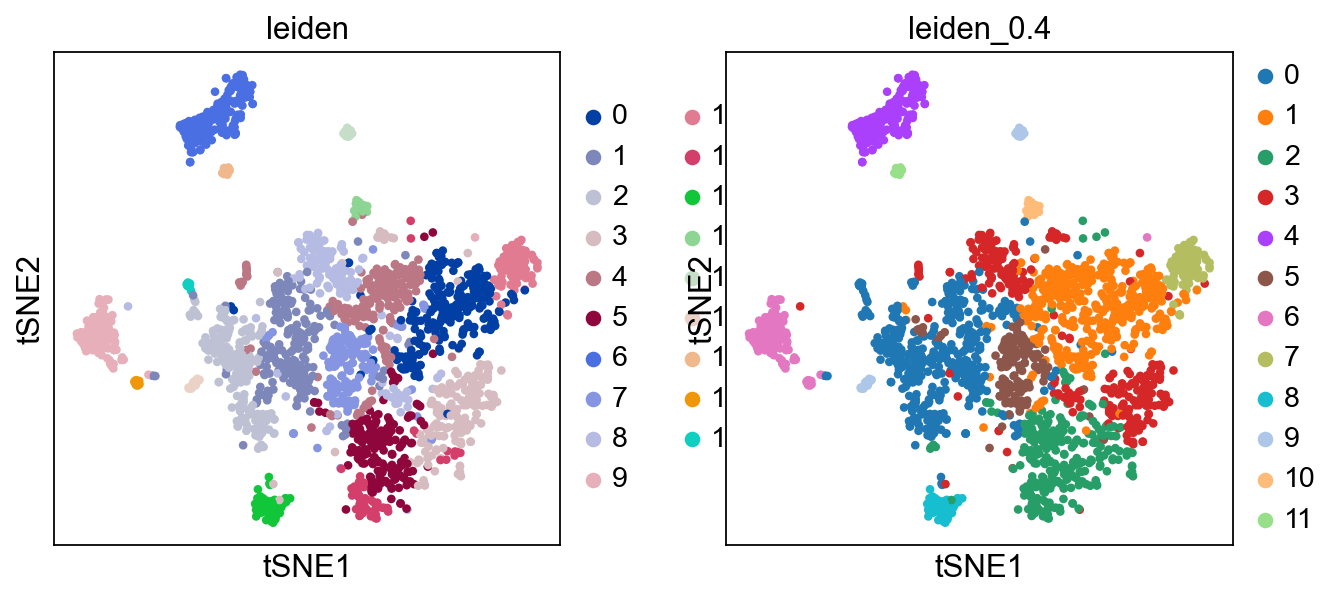

In [53]:
sc.pl.tsne(adata, color=['leiden', 'leiden_0.4'])


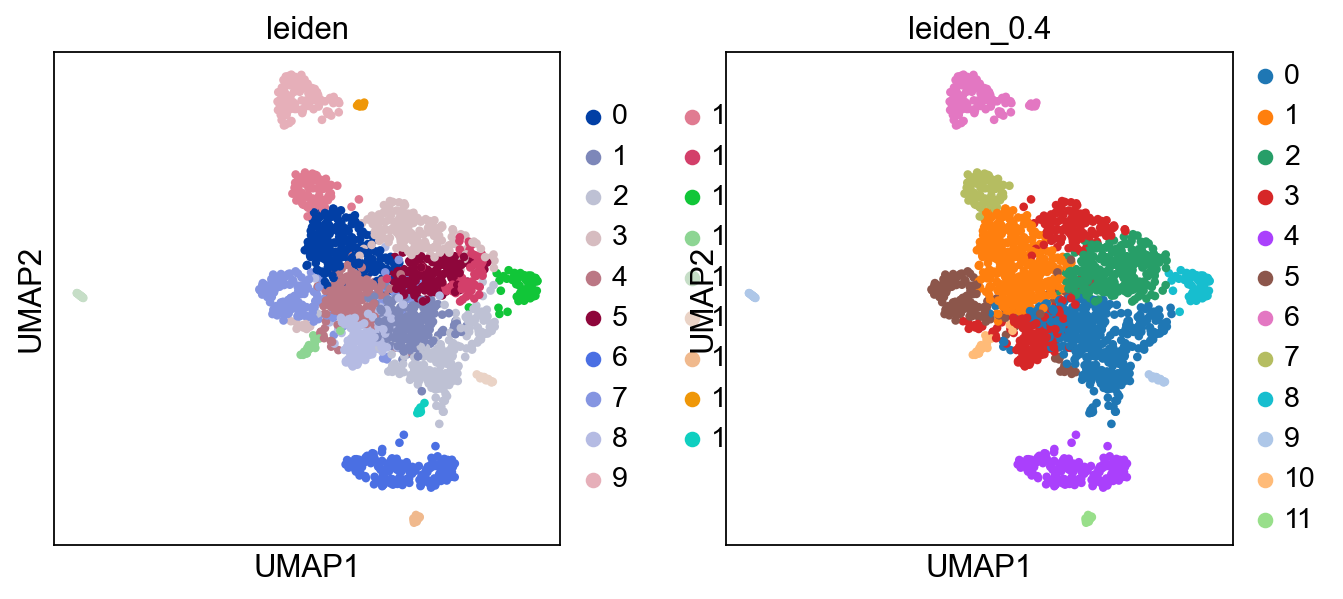

In [52]:
sc.pl.umap(adata, color=['leiden', 'leiden_0.4'])


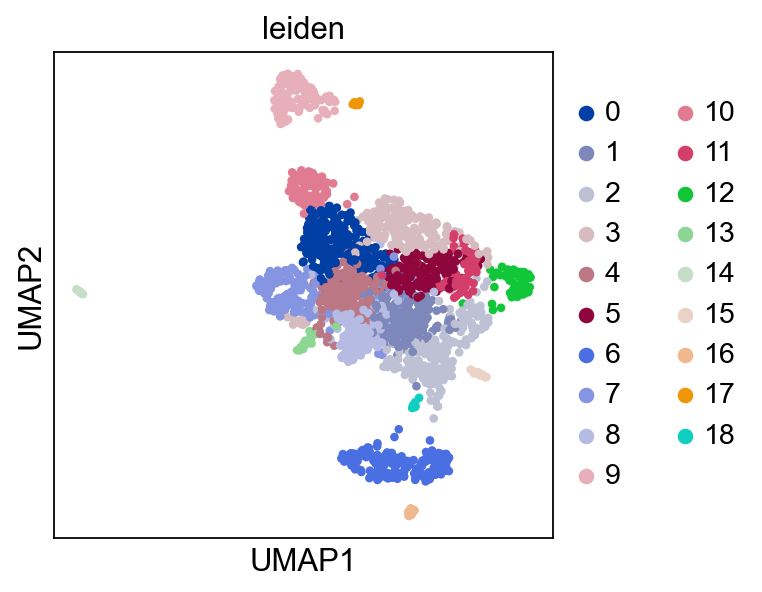

In [54]:
sc.pl.umap(adata, color=['leiden'])


In [56]:
sc.tl.louvain(adata, key_added = "louvain")


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


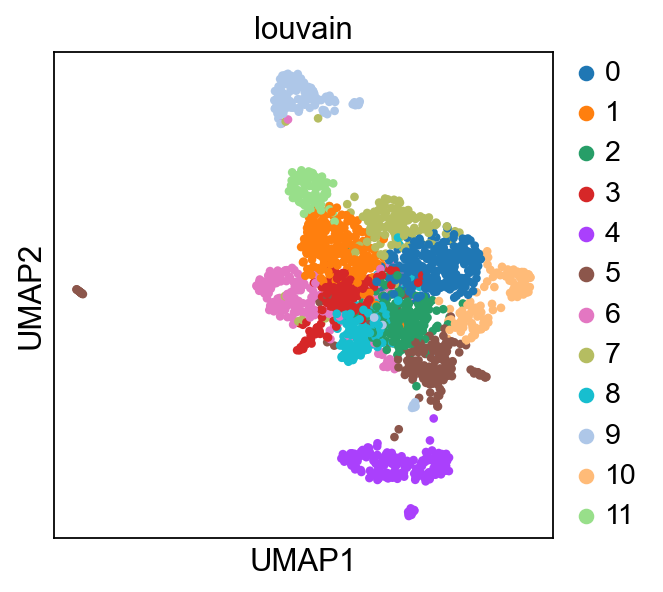

In [57]:
sc.pl.umap(adata, color=['louvain'])


In [58]:
sc.tl.leiden(adata, resolution = 0.3, key_added = "leiden_0_3")

running Leiden clustering
    finished: found 10 clusters and added
    'leiden_0_3', the cluster labels (adata.obs, categorical) (0:00:00)


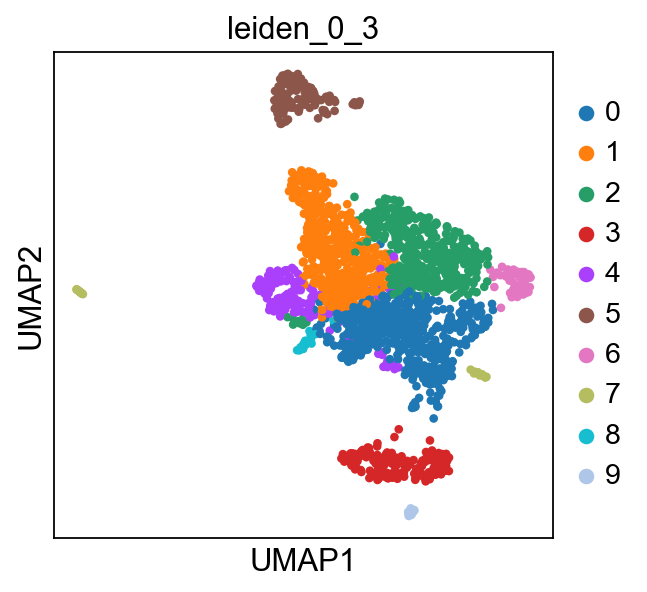

In [59]:
sc.pl.umap(adata, color=['leiden_0_3'])


In [60]:
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0_4")

running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0_4', the cluster labels (adata.obs, categorical) (0:00:00)


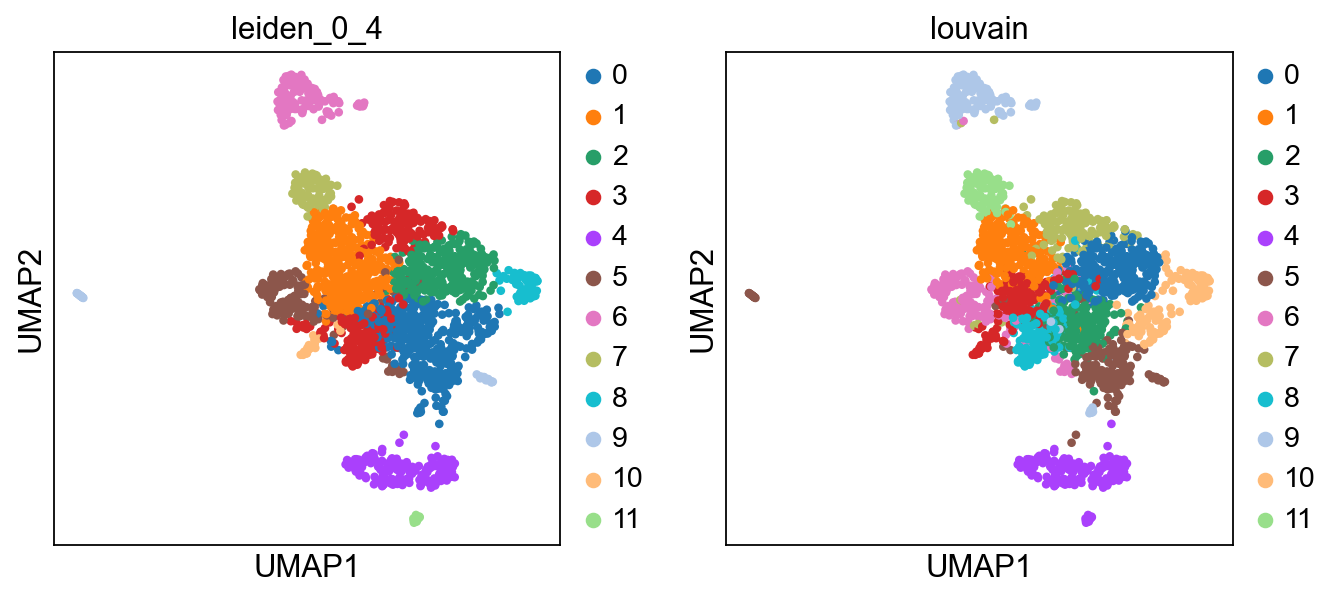

In [62]:
sc.pl.umap(adata, color=['leiden_0_4', 'louvain'])


다른 method 를 비교함으로써 어느정도 consensus 를 찾을 수 있다. 